<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2023-11-28<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](http://www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节3.1.12）

<a href="https://item.jd.com/14285722.html"><img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true"  width="200"/></a>
<a href="https://item.jd.com/14285722.html">点击购书</a>

* [GTO](#GTObasics)
    * [1. STO 1s轨道的定义与可视化](#sto_1s)
    * [2. 如何用Gaussian基函数拟合STO-1g](#sto1g)
        * [非线性最小二乘法](#method1)
        * [交叠积分最大法](#method2)
    * [3. STO-nG的系数拟合](#sto-ng)
* [参考](#references)

<a name="sto_1s"></a>
# STO 1s轨道的定义与可视化

最简单的斯莱特型轨道（Slater Type Orbital, STO）是\(1s\)轨道，通常表示为$\psi_{1s}(\mathbf{r}; \zeta_a, \mathbf{R}_a)$。在这个表达式中，$\mathbf{r}$是电子的位置矢量，$\zeta_a$是一个称为轨道指数的参数，$\mathbf{R}_a$是与轨道相关联的原子或核$a$的位置矢量。

$1s$ STO的函数形式为：

$$
\psi_{1s}(\mathbf{r}; \zeta_a, \mathbf{R}_a) = \left(\frac{\zeta_a^3}{\pi}\right )^{1/2} e^{-\zeta_a |\mathbf{r} - \mathbf{R}_a|}
$$


其中，$ |\mathbf{r} - \mathbf{R}_a| $是电子和核$a$之间的距离。


In [ ]:
import numpy as np

def STO_1s(r, Ra, zeta):
    """
    Compute the value of the 1s Slater-type orbital (STO) at a given position.

    Parameters:
    r: float
        Position vector of electron.
    Ra: np.ndarray or float
        Position vector of the nucleus (center of the STO).
    zeta: float
        Orbital exponent.

    Returns:
    float
        Value of the 1s STO at the given position.
    """

    # Calculate distance between electron and nucleus
    distance = np.linalg.norm(r - Ra, axis=-1)

    # Calculate the normalization constant
    N = ( zeta**1.5 ) * np.sqrt(1/np.pi)

    # Compute the value of the STO
    value = N * np.exp(-zeta * distance)

    return value



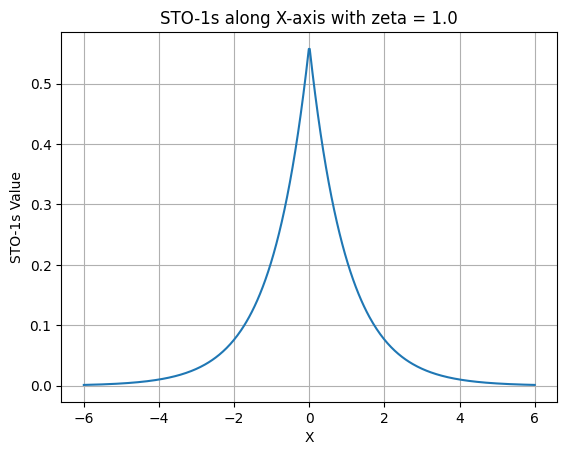

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_orbital_data(orbital_func, zeta):
    """
    Generates data for an orbital (such as STO or GTO) along a 1D grid.

    :param orbital_func: The function representing the orbital. It should accept three parameters:
                         the position vector `r`, the center `Ra`, and the parameter `zeta`.
    :param zeta: The parameter for the orbital function.
    :return: A tuple of (x-coordinates, orbital values).
    """
    x = np.linspace(-6, 6, 500)
    values = np.zeros(x.shape)
    Ra = np.array([0, 0, 0])

    for i, x_val in enumerate(x):
        r = np.array([x_val, 0, 0])
        values[i] = orbital_func(r, Ra, zeta)

    return x, values

def plot_STO_1s(x, values, zeta):
    """
    Plots the STO-1s values along the x-axis.

    :param x: X-coordinates.
    :param values: STO-1s values.
    :param zeta: The zeta parameter used for generating STO-1s data.
    """
    plt.figure()
    plt.plot(x, values)
    plt.xlabel('X')
    plt.ylabel('STO-1s Value')
    plt.title(f'STO-1s along X-axis with zeta = {zeta}')
    plt.grid(True)
    plt.show()

# Example Usage
zeta_value = 1.0
x, sto_values = generate_orbital_data(STO_1s, zeta_value)
plot_STO_1s(x, sto_values, zeta_value)



<a name="sto1g"></a>
# 如何用Gaussian基函数拟合STO-1g

<a name="method1"></a>
## 方法一：非线性最小二乘

我们可以用非线性拟合的方法确定GTO 1s的一个待定系数$\alpha$。转化成具体的数学问题是

1s类型的Gauss基函数，取什么$\alpha$与STO 1s最接近:
$$
{G}_{1s}(r;\alpha) = \left( \frac{2\alpha}{\pi} \right)^{3/4} e^{-\alpha r^2}
$$

为此，我们定义一个损失函数

$$
\int sin(\theta)d\theta d\phi\int_{1.0}^{6.0} |G_{1s}(r;\alpha)-\psi_{1s}(r)|^2r^2dr = 4\pi\int_{1.0}^{6.0} |G_{1s}(r;\alpha)-\psi_{1s}(r)|^2r^2dr
$$

$\alpha$值可以通过非线性最小二乘得到。




In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Example model: gaussian
def model(params, r):
    alpha = params[0]
    return (2 * alpha / np.pi) ** (3/4) * np.exp(-alpha * r ** 2) * r

# Data points (x values and y values)
x_data = np.linspace(0, 10, 100)
zeta = 1.0
y_data = (zeta ** 3 / np.pi) ** (1/2) * np.exp(-zeta * x_data) * x_data


# Function to compute the difference between model predictions and actual data
def residual(params, x, y):
    return model(params, x) - y

# Initial guess for parameters [alpha]
initial_guess = [0.5]

# Perform least squares optimization
result = least_squares(residual, initial_guess, args=(x_data, y_data))

print("Optimized parameters:", result.x)


Optimized parameters: [0.27095244]


<a name="method2"></a>
## 方法二：最大交叠积分法

参照Szabo的书中方法,我们可以将两个函数之间的差异最小化的做法转化为最大化GF和STO之间的交叠。

In [ ]:
from sympy import symbols, pi, exp, integrate, oo

# Define symbols for the parameters and variables
zeta, r, alpha, a11 = symbols("zeta r alpha a11", positive=True)

# Define the general expression for a Slater-type orbital (STO)
sto_1s = (zeta ** 3 / pi) ** (1/2) * exp(-zeta * r)

# Define the general expression for a Gaussian-type orbital (GTO)
gto_1s = (2 * alpha / pi) ** (3/4) * exp(-alpha * r ** 2)

# Substitute specific parameters for the 1s orbitals
sto_1 = sto_1s.subs(zeta, 1.0)  # STO with zeta = 1.0
gf_1 = gto_1s.subs(alpha, a11)  # GTO with alpha = a11

# Calculate the overlap integral between the STO and GTO
S = integrate(sto_1 * gf_1 * r ** 2, (r, 0, oo)) * 4 * pi

# Function to maximize the overlap (minimize the negative overlap)
def func(a):
    res = S.subs(a11, a[0]).evalf()
    return -res  # Negative sign for maximization

# Perform the minimization to find the optimal alpha parameter
from scipy.optimize import minimize
res = minimize(func, x0=[0.2], bounds=[(0.1, 1)])
alpha_optimal = res.x[0]  # Optimal alpha value

alpha_optimal

0.27095000530375923

可视化拟合得到的GTO

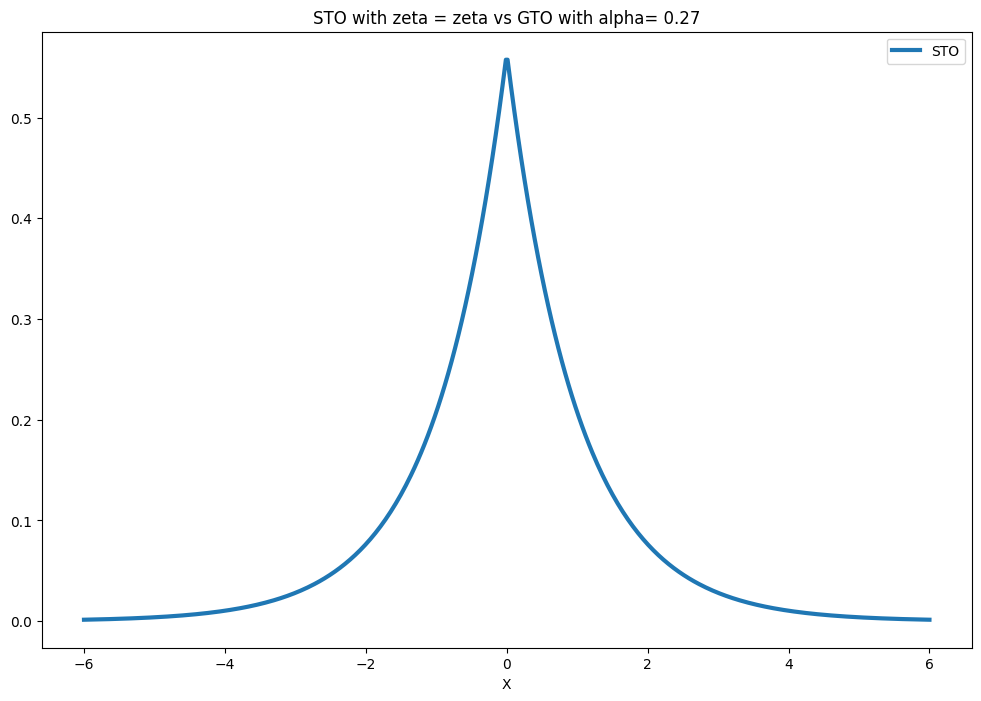

In [ ]:
def GTO_1s(r, Ra, alpha):
    """
    Compute the value of the 1s Gaussian-type orbital (GTO) at a given position.

    Parameters:
    r: np.ndarray or float
        Position vector of electron.
    Ra: np.ndarray or float
        Position vector of the nucleus (center of the GTO).
    alpha: float
        Orbital exponent.

    Returns:
    float
        Value of the 1s GTO at the given position.
    """

    # Calculate distance between electron and nucleus
    distance_squared = np.linalg.norm(r - Ra)**2

    # Calculate the normalization constant
    N = (2 * alpha / np.pi)**(3 / 4)

    # Compute the value of the GTO
    value = N * np.exp(-alpha * distance_squared)

    return value


# Example Usage
x, gto_values = generate_orbital_data(GTO_1s, alpha_optimal)

plt.figure(figsize=(12,8))
plt.plot(x, sto_values, label='STO', linewidth=3)
#plt.plot(x, gto_values, label='GTO', linewidth=3)
plt.legend()
plt.xlabel('X')
plt.title(f'STO with zeta = {zeta} vs GTO with alpha= {alpha_optimal:.2f}')
plt.grid(False)
plt.show()

<a name="sto-ng"></a>
# STO-nG系数的拟合

在量子化学中，斯莱特型轨道（STO）的拟合通过STO-nG方法进行是一种有效的手段。这个过程涉及将STO用n个高斯函数（GTO）的线性组合来逼近。以下是通常的拟合步骤：

1. **选择参考STO**：首先，确定要拟合的STO轨道的数学形式。例如，1s轨道的STO可以表示为 $Ne^{-\zeta r}$，其中$N$是归一化常数，$\zeta$是斯莱特指数，$r$是与原子核的距离。

2. **定义高斯基函数集**：对于STO-nG基，每一个高斯函数表示为 $g_i(r) = N_i e^{-\alpha_i r^2}$，其中$N_i$为归一化常数，$\alpha_i$为高斯指数。

3. **优化过程**：通过优化算法确定一组$\{c_i, \alpha_i\}$参数，以使得STO与GTO线性组合的差异最小化。这通常涉及最小化STO和GTO线性组合间的积分平方差（L2范数）或最大化与STO的交叠积分。

4. **归一化**：优化后的高斯函数线性组合需要归一化，以确保它满足概率密度函数的归一条件。

这个优化过程可能需要复杂的数值方法，并且通常会使用先进的计算化学软件来完成，以确保高质量的拟合。拟合好的STO-nG基组被广泛用于量子化学计算，预测分子的电子结构和性质。

In [ ]:
from sympy import symbols, pi, exp, integrate, oo, lambdify, solve
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def get_gto(d, alpha, r):
    """
    Returns the Gaussian Type Orbital (GTO) expression.

    :param d: Coefficient of the GTO.
    :param alpha: Exponential parameter of the GTO.
    :param r: The radial coordinate symbol.
    :return: GTO expression.
    """
    return d * (2 * alpha / pi) ** (3/4) * exp(-alpha * r**2)

def get_symbols(L):
    """
    Generates two sets of symbolic variables: 'ds' and 'alphas'.

    Parameters
    ----------
    L : int
        The number of symbolic variables to generate for each set.

    Returns
    -------
    tuple of (list, list)
        A tuple containing two lists:
        - The first list contains 'L' symbolic variables named 'd0', 'd1', ..., 'd(L-1)'.
        - The second list contains 'L' symbolic variables named 'alpha0', 'alpha1', ..., 'alpha(L-1)'.
        All symbols are constrained to be positive.

    Examples
    --------
    >>> L = 3
    >>> ds, alphas = get_symbols(L)
    >>> ds
    [d0, d1, d2]
    >>> alphas
    [alpha0, alpha1, alpha2]
    """

    ds = symbols(f'd:{L}', positive=True)
    alphas = symbols(f'alpha:{L}', positive=True)
    return ds, alphas

class STOLG:
    """
    A class for representing and computing the Slater Type Orbital Linear Combination of Gaussian (STO-LG).

    This class computes a linear combination of Gaussian functions (GFs) to approximate a Slater Type Orbital (STO).

    Parameters
    ----------
    L : int, optional
        The number of Gaussian functions in the linear combination. Default is 3.
    zta : float, optional
        The zeta parameter for the STO. Default is 1.0.

    Attributes
    ----------
    L : int
        The number of Gaussian functions.
    ds : list of sympy.Symbol
        List of coefficients (d) for the Gaussian functions.
    alphas : list of sympy.Symbol
        List of alpha parameters for the Gaussian functions.
    GFs : list of sympy.Expr
        List of Gaussian function expressions.
    GF_sum : sympy.Expr
        Sum of all Gaussian function expressions.
    gg_int : sympy.Expr
        Integral of the square of GF_sum over the radial coordinate.
    sto : sympy.Expr
        The Slater Type Orbital expression.
    S : sympy.Expr
        Integral of the product of GF_sum and sto over the radial coordinate.

    Examples
    --------
    >>> stolg = STOLG(L=3, zta=1.0)
    >>> stolg.L
    3
    >>> stolg.S
    [Expression for the integral of the product of GF_sum and sto]
    """

    def __init__(self, L=3, zta=1.0):
        """
        Initializes the STOLG object with the specified number of Gaussian
        functions and zeta parameter for the STO.
        """
        self.L = L
        self.ds, self.alphas = get_symbols(L)

        r = symbols('r', real=True, positive=True)  # Radial coordinate symbol
        self.GFs = [get_gto(d, a, r) for d, a in zip(self.ds, self.alphas)]

        self.GF_sum = sum(self.GFs)
        self.gg_int = integrate(self.GF_sum * self.GF_sum * r**2, (r, 0, oo)) * 4 * pi
        self.gg_int = self.gg_int.evalf()

        zeta = symbols('zeta', real=True, positive=True)
        sto_1s = (zeta ** 3 / pi) ** (1/2) * exp(-zeta * r)
        self.sto_1s = sto_1s
        self.sto = sto_1s.subs(zeta, zta)
        self.S = integrate(self.GF_sum * self.sto * r**2, (r, 0, oo)) * 4 * pi


    def fit(self):
        """
        Fits the parameters of the Gaussian functions to optimize the
        approximation of the Slater Type Orbital.

        This method uses numerical optimization to find the coefficients and
        alpha parameters for the Gaussian functions that best approximate the STO.
        The optimization is performed by minimizing the negative value of
        the integral of the product of the sum of Gaussian functions and the STO.

        Returns
        -------
        OptimizeResult
            The result of the optimization process. This object contains
            information about the optimization, including the optimal values
            for the parameters.

        Notes
        -----
        The optimization is performed using a nonlinear least squares
        minimization. Initial guesses for the parameters are set, and
        scipy's `minimize` function is used to find the optimal values.

        The `_func` inner function is used as the target function for
        minimization. It computes the negative of the overlap integral
        between the linear combination of Gaussian functions and the STO,
        with the current parameters.

        Examples
        --------
        >>> stolg = STOLG(L=3, zta=1.0)
        >>> result = stolg.fit()
        >>> result.x  # Optimal parameters
        [Array of optimal d and alpha values]
        """

        def _func(x):
            """
            Target function for optimization to fit the Gaussian functions' parameters.

            This function calculates the value used by the optimizer to determine the
            best fit of the Gaussian functions to the Slater Type Orbital. It first
            substitutes the given parameters into the symbolic expressions, then
            evaluates these expressions to find the optimal parameters.

            Parameters
            ----------
            x : list or array-like
                A list of numerical values for the parameters of the Gaussian functions,
                excluding the first coefficient of the Gaussian functions (self.ds[0]).

            Returns
            -------
            float
                The negative of the evaluated value of the integral expression. This
                value is used by the optimization algorithm to find the parameters
                that maximize the overlap between the Gaussian and Slater functions.

            Notes
            -----
            The function internally solves for the first coefficient (self.ds[0]) to
            ensure the normalization condition of the Gaussian functions is satisfied.
            """
            subs = {i: j for i, j in zip(self.ds[1:] + self.alphas, x)}
            d0_val = solve(self.gg_int.subs(subs) - 1)
            subs[self.ds[0]] = d0_val[0]  #ensure normalization of GFs
            val = self.S.subs(subs).evalf()
            self.subs = subs
            return -float(val)

        d_vals = np.linspace(0.5, 0.1, self.L - 1).tolist()
        alpha_vals = np.linspace(0.1, 0.9, self.L).tolist()
        self.res = minimize(_func, x0=d_vals + alpha_vals, bounds=[(0, 10)] * (2 * self.L - 1))
        return self.res


    @property
    def expression(self):
        expr = []
        for i, j in zip(self.ds, self.alphas):
            expr.append(r"%.6f\phi^{GF}(%.6f)" % (self.subs[i], self.subs[j]))
        return display(Math('+'.join(expr)))

    @property
    def func(self):
        #lambdify is a utility that takes a symbolic expression and converts it into a callable function that can be used with numerical libraries like NumPy.
        return lambdify(r, self.GF_sum.subs(self.subs), "numpy")

    @property
    def funcs(self):
        return [lambdify(r, i.subs(self.subs), "numpy") for i in self.GFs]

    def __call__(self, r):
        return self.func(r)

    def plot(self, r):
        # Assuming r is a SymPy symbol defined in your class or globally
        r_symbol = symbols('r')

        # Define the STO function symbolically
        sto_1s = (zeta ** 3 / pi) ** (1/2) * exp(-zeta * r_symbol)
        sto_1 = sto_1s.subs(zeta, 1.0)

        # Use lambdify to create a callable function
        sto_1_np = lambdify(r_symbol, sto_1, "numpy")
        plt.plot(r, self(r), '-', label=f'STO-{self.L}G')
        for i in range(self.L):
            plt.plot( r, self.funcs[i](np.abs(r)), '--', label=f'GF-{i}')
        plt.plot(r, sto_1_np(np.abs(r)), '-', label='STO')
        plt.legend()

STO-2g结果：

In [ ]:
sto2g = STOLG(L=2)
sto2g.fit()

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.9984197028262308
        x: [ 4.302e-01  1.516e-01  8.517e-01]
      nit: 18
      jac: [ 3.331e-07  2.309e-06 -1.210e-06]
     nfev: 88
     njev: 22
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [ ]:
sto2g.expression

<IPython.core.display.Math object>

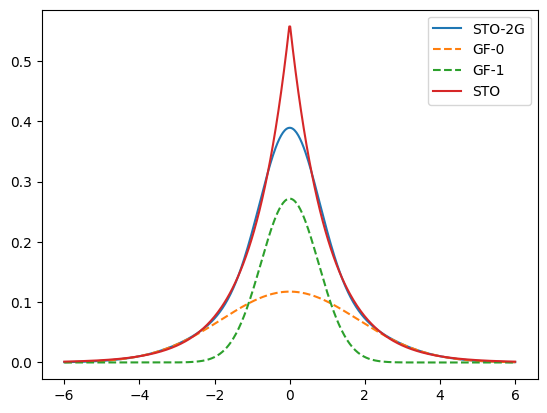

In [ ]:
r_np = np.linspace(-6, 6, 500)
sto2g.plot(r_np)

STO-3g结果

In [ ]:
sto3g = STOLG(L=3)
sto3g.fit()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -0.999834733948039
        x: [ 5.351e-01  1.544e-01  1.099e-01  4.059e-01  2.226e+00]
      nit: 41
      jac: [-1.843e-06 -5.174e-06 -1.210e-06  1.016e-05 -1.743e-06]
     nfev: 300
     njev: 50
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>

In [ ]:
sto3g.expression

<IPython.core.display.Math object>

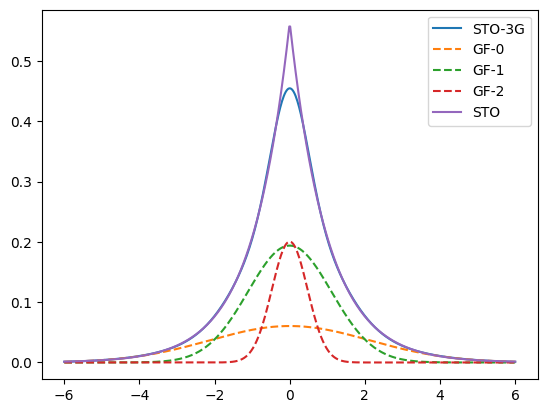

In [ ]:
sto3g.plot(r_np)

## 参考资料

- [单斌、陈征征、陈蓉(2023). 《计算材料学：从算法原理到代码实现》. 华中科技大学出版社（作为配套教材强烈建议购买！）](https://item.jd.com/10089064828853.html)
- [McMurchie-Davidson](https://github.com/jjgoings/McMurchie-Davidson)
- [A (hopefully) gentle guide to the computer implementation of molecular integrals over Gaussian basis functions](https://joshuagoings.com/2017/04/28/integrals/)
- [Evaluation-of-gaussian-molecular-integrals](https://www.mathematica-journal.com/2012/02/16/evaluation-of-gaussian-molecular-integrals/)
- [Small Gaussian Expansions of Slater‐Type Orbitals](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjt4tP30s2CAxWiL0QIHaTSCcAQFnoECBcQAQ&url=https%3A%2F%2Fpubs.aip.org%2Faip%2Fjcp%2Farticle%2F52%2F1%2F431%2F85134%2FSmall-Gaussian-Expansions-of-Slater-Type-Orbitals&usg=AOvVaw0r1cgWADJnPHPKUSIc-mkR&opi=89978449)
- [A Systematic Approach for Understanding Slater–Gaussian Functions in Computational Chemistry](https://www.researchgate.net/publication/258795536_A_Systematic_Approach_for_Understanding_Slater-Gaussian_Functions_in_Computational_Chemistry)
- [Questions About Basis Sets](https://downloads.wavefun.com/FAQ/BasisSetFAQ.html)
- [Fitting the parameters in STO-LG](https://chc273.github.io/fitting-parameters-in-sto-lg/)

## 教学视频

<iframe width="560" height="315" src="" frameborder="0" allowfullscreen></iframe>



In [4]:
from IPython.display import IFrame

# Embed the video using IFrame
IFrame(src=f"https://www.bilibili.com/video/BV1sb4y157ri/", width="1200", height="600", scrolling="no", border="0", frameborder="no", framespacing="0", allowfullscreen="true")